# Week 1: Introduction and Classification

## Some glossary

- Hard classifier is one that neccessitates no misclassification in its training/estimation. Soft classifier minimizes the weighted errors for misclassification, and the fitted model might have missclassified examples in the training data.
- The loss function in classifiers can be weighted according to ad hoc importance associated to each class. E.g. the classification of toxic mushrooms vs edible mushrooms, loan qualities etc. 
- A higher relative weight pushes the boundary away from that particular class. Bear in mind that for soft classifiers as the relative weight get too large the boundary will be so far away that potentially includes data of other classes.
- Structured data refers to datasets that can be stored in structured ways, e.g. numerical, string arrays

# Support Vector Machines (Linear)

Check [here](http://pyml.sourceforge.net/doc/howto.pdf) for a complete cover. A support vector is a vector that bounds the convex hull formed by the data points in a specific class. Notably, support vectors necessarily include data samples on the margin of the convex hull. The goal here is to find a set of separating hyperlines defined by a vector of coefficients (hence are parallel) that classifies the classes/minimizes (weighted) misclassification errors, and that the distance between the hyperplane and the nearest point from either group is maximized. 

SVMs are known to work well with data of high dimensional data, especially for $K>>N$. This is because the complexity is $O(KN^2)$. Before the rise of neural networks, (kernel) SVMs are the workhorse for pattern recognition.

## Hard margin linear formulation

The mathematical formulation for a __linear, hard margin__ SVM problem with binary classes $y_i \in \{-1,1\}$ and data points $(x_1, x_2, \ldots, x_n)$ where $x_i$ does not include the constant, is:

\begin{align*}
&\max_{a,b} D(a, b; x_1, x_2, \ldots, x_n)\\
&s.t. \begin{cases}
a^T x_i + b \geq 1, & y_i = 1 \\
a^T x_i + b \leq -1, & y_i = -1 \\
\end{cases}
\end{align*}

We note that the distance metric $D(a, b; x_1, x_2, \ldots, x_n)$ is given by the distance between hyperplanes that are defined by $a^T x + b = 1$ and $a^T x + b = -1$. To derive this, note that the unit normal vector that is paralleled to the either plane is $\frac{a}{\Vert a \Vert}$. Suppose $z$ is on $a^T x + b = -1$, then $z + t(\frac{a}{\Vert a \Vert})$ where t is the distance between the planes will be on $a^T x + b = 1$.

\begin{align*}
a^T\big(z + t\frac{a}{\Vert a \Vert}\big) + b &= 1 \\
(a^T z + b) + t \frac{\Vert a \Vert^2}{\Vert a \Vert}  &= 1\\
(-1) + t \Vert a \Vert &= 1\\
t &= \frac{2}{\Vert a \Vert}
\end{align*}

Also noting that the constraints can be expressed as $(a^T x_i + b)y_i \geq 1$ we express the SVM problem as:

\begin{align*}
&\min_{a,b} \frac{1}{2}{\Vert a \Vert^2}\\
&s.t. (a^T x_i + b)y_i \geq 1 \text{   } \forall i
\end{align*}

When we get SVM $(a,b)$ we can adjust "zero" to account for ad hoc penalty of misclassification. For example, if a hard margin SVM is defined by $a^T x + b = 0$. We can penalize misclassification into this class by adding a constant (absolute value < 1). Suppose we want to penalize $y=1$ , the event of loan repayment so that the bank does not overlend, we can add a constant, say $\frac{1}{3}$ such the $y=1$ only if $a^T x + b \geq \frac{1}{3}$.

## Soft margin linear formulation

Check [here](https://towardsdatascience.com/support-vector-machines-soft-margin-formulation-and-kernel-trick-4c9729dc8efe) for more discussion. Recall that a SMV has a boundary defined by some discriminary function $f$, e.g. linear function $a^T x +b$ as we have been studying so far. The decision __boundary__ is defined by $f(x) = 0$, while the __margins__ are defined by $f(x) = \pm 1$. A hard margin SVM requires that all points with $y = \pm1$ lie within $f(x) = \pm 1$, i.e. strict enforcement of $f(x_i) y_i \geq 1$. A soft margin classifier, on the other hand, tolerates out-of-margin or even misclassified data points in the training process. We would prefer soft to hard margin classifier as the data itself might not be linearly separable, or to avoid overfitting when outliers are being forced to lie on the correct side, distorting the boundary. Instead of having margin inclusion as hard constraints, we now minimize both the classification error and the norm of weights. Recall that $(a^T x + b)y \geq 1$ implies no error so the classification error can be expressed as $\max\{0, 1-(a^T x +b)y\}$. Therefore, we express the soft margin linear SVM training problem as:

\begin{align*}
&\min_{a,b} \sum_i \max\{0, 1-(a^T x_i +b)y_i\} + \frac{\lambda}{2}\Vert a \Vert^2\\
\end{align*}

Here $\lambda$ is the tradeoff between increasing the margin size and ensuring that the data points lie on the correct side of the margin. If we want to specify that importance/contribute vary across data points we can attribute weight $w_i$ to the $i$-th observation, as in:

\begin{align*}
\min_{a,b} \sum_i w_i \max\{0, 1-(a^T x_i +b)y_i\} + \frac{1}{2}\Vert a \Vert^2\\
\end{align*}

$\lambda$ dissipated because when relative importance of $w_i$ vary it suffices to normalize importance of minimizing $\Vert a \Vert^2$ to 1. Some examples of weighing $w_i$ can be: assigned by $y_i$ if a particular outcome is rare or of different importance than the other. Data known to be boundary case and misclassified often, etc. Note that there is a Lagrange multiplier interpretation of $w_i$, by rewriting the problem as:

\begin{align*}
\min_{a,b} \sum_i w_i \big((a^T x_i +b)y_i-1\big) + \frac{1}{2}\Vert a \Vert^2\\
\end{align*}

Here $w_i = 0$ if $(a^T x_i +b)y_i - 1< 0$ and $w_i > 0$ otherwise. In other words, this complementary slackness implies a weight assignment determined by whether the data point lies on the correct region. In the literature, it is perhaps more common to express this in terms of slack variables $\xi_i$ (check [here](https://math.stackexchange.com/questions/3133125/why-do-derivations-for-svm-not-consider-slack-variables-for-inequality-constrain) for a discussion on the equivalence):

\begin{align*}
&\min_{a,b} C\sum_i \xi_i + \frac{1}{2}{\Vert a \Vert^2}\\
&s.t. (a^T x_i + b)y_i \geq 1 - \xi_i, \xi_i \geq 0 \text{   } \forall i
\end{align*}

The intuition on values of $\xi_i$: 0 means within the margin, between 0-1 implies inside the margin, >1 means out of the margin. A smaller value of $C$ allows the classifier to ignore points close to the boundary, and increases the margin. 

## Need for feature engineering

Models that are trained on distance metrics defined as functions of data values will require rescaling so that the distance will be unit-free. E.g. we would not want to have variations in large unit variables (e.g. SAT score) to dominate variables with smaller units (e.g. age). This will also apply to SVM. We can either compress the variables to a uniform (scaling) or normal (standardizing):
1. Scaling usually applies to data known with bounds, e.g. RGS color intensities (0-255), SAT scores (200-800). It is also applied to neural network variables.
2. Standardization applies to PCA and clustering.

Usually, standardization is preferred, in general. Zero-mean and unit-variance make it easier to learn the weights. It also maintains useful information in outliers and makes the algorithm less sensitive to them (relative to min-max scaling). If unsure, it is always a good idea to try both.

# K-Nearest Neighbor Classifier

Notes from previous read of Python Machine Learning (Raschka):
- Non-parametric classifier:
    1. Choose a natural number k and a distance metric (Manhattan, Eucliean, Minkowski etc)
    2. For each point to be classified, find the k nearest samples wrt chosen metric
    3. Prediction of class labels by majority vote
    4. As KNN are trained on distance concepts, features must be standardized to prevent bias against large scales.
- Hyper-parameter: $k$ – overfitting-performance tradeoff, distance – needs to be meaningful.
- Advantage: Simple to implement, handles multi-class cases, do well with enough representative data. Disadvantage: computationally expensive, the need to store data.
- Disadvantage: it cannot be regularized, prone to curse of dimensionality and overfitting: if we would keep adding features, the dimensionality of the feature space grows, and becomes sparser and sparser. Due to this sparsity, it becomes much more easy to find a separable hyperplane because the likelihood that a training sample lies on the wrong side of the best hyperplane becomes infinitely small when the number of features becomes infinitely large (but sample size remains finite). Check [here](https://www.visiondummy.com/2014/04/curse-dimensionality-affect-classification/) for a detailed explanation.


# Support Vector Machine (Kernel)

Linearly separability is rare in real life data set. In order to account for this in SVM, a straightforward workaround would be to map the feature space $X$ (or add non-linear terms) to a (potentially different dimension) transformed feature space $\phi(X)$ that exhibits linear separability. The resulting separating function becomes $a^T \phi(x) + b = 1$, which permits non-linearity in shape.

Such transformation, despite intuitive, will be computationally expensive. For example, if $\phi$ is the square operator, the number of terms increases linearly ($C^k_2$ cross terms). Fortunately, the kernel trick allows us to scale these transformed SVM efficiently. The kernel trick utilitzes two assumptions:

1. The kernel function associated with mapping $\phi$, $\kappa(x,x') = \phi^T(x)\phi(x)$ can be evaluated easily. 
2. Optimal weight vector $a$ can be expressed as a linear combination of the training examples $\sum_i \alpha_i x_i$. In the transformed feature space, $a = \sum_i \alpha_i \phi(x_i)$.

The motivation is that the kernel function will be evaluated numerous times. 

\begin{align*}
&a^T \phi(x) + b \\
=&\big(\sum_i \alpha_i \phi(x_i)\big)^T \phi(x) +b\\
=&\sum_i \alpha_i \phi(x_i)^T\phi(x) + b\\
=&\sum_i \alpha_i \kappa(x_i, x) + b
\end{align*}

An example is the quadratic transformation on a 2-dimensional feature space. Suppose $\phi(x) = [x_1^2, \sqrt{2}x_1 x_2, x_2^2]$. The kernel function is:

\begin{align*}
\phi^T(x)\phi(z) &= (x_1^2, \sqrt{2}x_1 x_2, x_2^2)^T(z_1^2, \sqrt{2}z_1 z_2, z_2^2)\\
&= (x_1 z_1)^2 + 2 x_1 x_2 z_1 z_2 + (x_2 z_2)^2 \\
&= (x^Tz)^2
\end{align*}

Popular kernels include polynomial kernel, sigmoid, Gaussian kernel, etc ([more](https://data-flair.training/blogs/svm-kernel-functions/)). Note that even though the kernel trick is motivated by a mapping $\phi$ we only need the kernel functions. For example, the Gaussian kernel given by $\kappa(x,x') = \exp(-\gamma\Vert x-x'\Vert^2)$ does not have a mapping with explicit form $\phi$ (check [here](https://stats.stackexchange.com/questions/69759/feature-map-for-the-gaussian-kernel) for more detailed discussion - turns out, the mapped feature space is of infinite dimension).

Kernelized SVMs are reasonably powerful - before the age of neural networks, a quadratic kernel was able to outperform other models on the MNIST dataset.


# SVM with Unbalanced Data

Caution needs to be taken when applying classifiers to datasets with unbalanced classes (very rare occassions of a particular class label). First, there might not be sufficient examples to produce consistent fits. Even if there are sufficient examples in the entire dataset, information loss will be incurred in the train-test split if the process does not ensure stratified subsets of data. Finally, because one event (WLOG, assume the positive response) is rare, it will be hard to properly gauge performance - even a classifier that predicts purely the dominant labels will result in a low error rate. Mathematically,

\begin{align*}
P(success) = P(success|+)P(+) + P(success|-)P(-)
\end{align*}

A modified metric would be the balanced success rate defined as:

\begin{align*}
\tilde{P}(success) = \frac{P(success|+)+P(success|-)}{2} \triangleq BSR
\end{align*}

The balanced error rate is defined as $1-BSR$. The concept on weighing success (thereby error) rates across classes is implemented in SVM through the hyper-parameter $C$. Instead of having a uniform contribution of error to the objective across all data points, we assign weights according to their classes: $C\sum_i \xi_i \leftarrow C_+ \sum_{I_+}\xi_i + C_- \sum_{I_-}\xi_i$. Note that the total contribution will be $C_+n_+$ and $C_-n_-$ for both classes, equal contribution implies $\frac{C_+}{C_-} = \frac{n_-}{n_+}$. So we can have $C_\pm = \lambda n_\mp$ where $\lambda$ controls the overall magnitude for regularisation.

# ISYE 6501 Homework #1

### Jeremy Wong | kwong301@gatech.edu

## Question 2.1

Describe a situation or problem from your job, everyday life, current events, etc., for which a classification model would be appropriate. List some (up to 5) predictors that you might use. 

## Answer for 2.1

A daily example where a classification model would be appropriate is the detection of suspicious user activities on network systems such as emails and cloud-based applications. To protect its users, each time a login activity is attempted the system will need to classify whether the current login is normal or suspicious. In the latter case, the system might require additional authentication (e.g. text messages) or even lock the account temporarily. Performance of this model will largely rely on its ability to model normal, realistic human behavior against fraudulent bots and malware, e.g. User behavior analytics (UBEA) models. If I were to build such a model, I will start with the following predictors:

1. __User activity log__. Structured, cleaned user historical data can naturally arise from user activity logs in terms of lagged variables (up to creation of credentials) such as <u>lagged login timestamp</u>, <u>lagged location</u>, and <u>lagged success</u> etc. Intuitively, we want to screen out activities implying impossible travels and suspicious timings (e.g. attempts with gaps too regular / too short).
2. __IP address__. For web systems, IP address can reveal information such as geographical location and internet service provider (ISP) which can help the model determine the status of the current login activity. At the minimum, it allows the system to determine if IP is from a known proxy pool.
3. __useragent__. Includes software, operating system, and browser (and their versions). For example, when login activities are detected from a new device GMail will prompt an email to the user. Also, some systems (e.g. e-commerce platforms) would want to screen out login attempts from scripted agents such as `selenium`.
4. __Geographical location__. For cell phone useragents.
5. __Users' Manual Input__. It is becoming common that login detection involves multiple-step authentication including DUO or text temporary PIN, in which the user provided a real-time additional response so the model can classify legitimate human behavior better. One function that used to be popular is CAPTCHA, in which the user is prompted to repeat the text from a distorted image. With the popularity of deep-learning models with increasingly powerful pattern recognition power, it is becoming a dated approach.

#### Reference

- [A Statistical Approach to Measuring User Authenticity](https://theory.stanford.edu/~dfreeman/papers/ato-model.pdf)
- [Microsoft cloud app UBEA documentation](https://docs.microsoft.com/en-us/cloud-app-security/tutorial-suspicious-activity)
- [Google's reCAPTCHA test has been tricked by artificial intelligence](https://www.wired.co.uk/article/google-captcha-recaptcha)
- [Integrating Python and kdb+ to detect suspicious logins](https://kx.com/blog/integrating-python-and-kdb-to-detect-suspicious-logins/)

## Question 2.2

The files `credit_card_data.txt` (without headers) and `credit_card_data-headers.txt` (with headers) contain a dataset with 654 data points, 6 continuous and 4 binary predictor variables.  It has anonymized credit card applications with a binary response variable (last column) indicating if the application was positive or negative. The dataset is the “Credit Approval Data Set” from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Credit+Approval) without the categorical variables and without data points that have missing values.

1.	Using the support vector machine function ksvm contained in the R package kernlab, find a good classifier for this data. Show the equation of your classifier, and how well it classifies the data points in the full data set.  (Don’t worry about test/validation data yet; we’ll cover that topic soon.)

2.	You are welcome, but not required, to try other (nonlinear) kernels as well; we’re not covering them in this course, but they can sometimes be useful and might provide better predictions than vanilladot.

3.	Using the k-nearest-neighbors classification function kknn contained in the R kknn package, suggest a good value of k, and show how well it classifies that data points in the full data set.  Don’t forget to scale the data (scale=TRUE in kknn).

__Some Tips__

1. On `ksvm`

    - You can use scaled=TRUE to get ksvm to scale the data as part of calculating a classifier.
    - The term λ we used in the SVM lesson to trade off the two components of correctness and margin is called C in ksvm. One of the challenges of this homework is to find a value of C that works well; for many values of C, almost all predictions will be “yes” or almost all predictions will be “no”.
    - ksvm does not directly return the coefficients a0 and a1…am. Instead, you need to do the last step of the calculation yourself. Here’s an example of the steps to take (assuming your data is stored in a matrix called data): 

    ```R
    # call ksvm.  Vanilladot is a simple linear kernel.
    model <- ksvm(data[,1:10],data[,11],type=”C-svc”,kernel=”vanilladot”,C=100,scaled=TRUE)
    # calculate a1…am
    a <- colSums(model@xmatrix[[1]] * model@coef[[1]])
    a
    # calculate a0
    a0 <- –model@b
    a0
    # see what the model predicts
    pred <- predict(model,data[,1:10])
    pred
    # see what fraction of the model’s predictions match the actual classification
    sum(pred == data[,11]) / nrow(data)
    ```
2. On `kknn`

    - You need to be a little careful. If you give it the whole data set to find the closest points to i, it’ll use i itself (which is in the data set) as one of the nearest neighbors. A helpful feature of R is the index –i, which means “all indices except i”.  For example, data[-i,] is all the data except for the ith data point. For our data file where the first 10 columns are predictors and the 11th column is the response, data[-i,11] is the response for all but the ith data point, and data[-i,1:10] are the predictors for all but the ith data point. (There are other, easier ways to get around this problem, but I want you to get practice doing some basic data manipulation and extraction, and maybe some looping too.)
    - Note that kknn will read the responses as continuous, and return the fraction of the k closest responses that are 1 (rather than the most common response, 1 or 0).

3. Other tips

Hint: You might want to view the predictions your model makes; if C is too large or too small, they’ll almost all be the same (all zero or all one) and the predictive value of the model will be poor.  Even finding the right order of magnitude for C might take a little trial-and-error.

Note: If you get the error “Error in vanilladot(length = 4, lambda = 0.5) : unused arguments (length = 4, lambda = 0.5)”, it means you need to convert data into matrix format:

```R
model <- ksvm(as.matrix(data[,1:10]),as.factor(data[,11]),type=”C-svc”,kernel=”vanilladot”,C=100,scaled=TRUE)
```

## Answer for 2.2 (1)

#### Data Inspection

We apply the linear SVM (soft margin) on the credit card data, which has 10 numerical features encoded as `A*` and a class `R1` that we target to fit and predict. We see below that the ranges and scales for the features vary, so we need to perform some kind of scaling to the data (which will be internalized by `kernlab`). The class label `R1` is rather balanced with a roughly 9:11 ratio - this should render the dataset balanced and a single regularization parameter should suffice. 

We would probably want to __standardize__ the data instead of a min-max scaling, at least for variable `A15`. It has rather high variance and likely some outliers. Standardization allows the model to maintain useful information in outliers and makes the algorithm less sensitive to them relative to min-max scaling. 

In [1]:
library(data.table)
library(magrittr)
library(kernlab)
library(kknn)
library(matrixStats)

data <- fread('./hw1/credit_card_data-headers.txt')
features <- names(data)[-length(data)] 
class <- names(data)[length(data)]

data %>% summary()

Warning message:
"package 'kknn' was built under R version 3.6.3"
Warning message:
"package 'matrixStats' was built under R version 3.6.3"


       A1               A2              A3               A8        
 Min.   :0.0000   Min.   :13.75   Min.   : 0.000   Min.   : 0.000  
 1st Qu.:0.0000   1st Qu.:22.58   1st Qu.: 1.040   1st Qu.: 0.165  
 Median :1.0000   Median :28.46   Median : 2.855   Median : 1.000  
 Mean   :0.6896   Mean   :31.58   Mean   : 4.831   Mean   : 2.242  
 3rd Qu.:1.0000   3rd Qu.:38.25   3rd Qu.: 7.438   3rd Qu.: 2.615  
 Max.   :1.0000   Max.   :80.25   Max.   :28.000   Max.   :28.500  
       A9              A10              A11              A12        
 Min.   :0.0000   Min.   :0.0000   Min.   : 0.000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.: 0.000   1st Qu.:0.0000  
 Median :1.0000   Median :1.0000   Median : 0.000   Median :1.0000  
 Mean   :0.5352   Mean   :0.5612   Mean   : 2.498   Mean   :0.5382  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.: 3.000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :67.000   Max.   :1.0000  
      A14               A15              

#### SVM model outline

We apply the model with liner kernel here, using the function `ksvm` under the package `kernlab`. In equation form, the SVM decision boundary is given by: $f(x) = a^T x + b$ where $a \in \mathbb{10}$ and $b \in \mathbb{R}$. The classification prediction will be given by sign of the discriminary function $f$, i.e. the hyperplane $f = 0$ will be the decision boundary. It is unlikely that the data can be separated linearly on a hard margin, so we opt to train a soft margin SVM. The objective for training is:

\begin{align*}
\min_{a,b} C\sum_i w_i \max\{0, 1-(a^T x_i +b)y_i\} + \frac{1}{2}\Vert a \Vert^2\\
\end{align*}

The margins of the SVM for each class are given by the regions $a^T x + b = \pm 1$, respectively. A soft margin SVM, as per the above equation, does not stricly require that all training data lie within the correct margins: the space between the two hyperplanes is maximized, while keeping _most_ data points within the correct margin implied by their labels. This trade off is calibrated by the hyper parameter $C$ which implicitly controls the magnitudes for the weights $w_i$. A large $C$ imposes high penalty in violating the margin constraint, and therefore will lead to smaller margins. On the other hand, a small $C$ imposes low penalty and tends to put less weights on the boundary cases to expand the margins.

#### Implementation

Some context of function arguments used in `ksvm`:
- `type="C-svc"` specifies that the SVM is to be used for classification (hence "svc" instead of "svr"). Moreover, the regularized with a constant $C$ that specifies cost of violation as in the above equation (as opposed to the percentage of support vectors, $\nu \in [0,1]$ in other formulations, see [here](https://www.quora.com/What-is-the-difference-between-C-SVM-and-nu-SVM) for discussion).
- `kernel` specifies the kernel function function used in the SVC, which decides the shape of the decision boundary $f = 0$.
- `C` is the regularization that determines the cost of classification constraints. High values of $C$ assigns more importance on classifying the data within the margin (hence typically results in a narrower margin length). Since the goal of this exercise is to explore the performance of fitted (optimized) SVM in terms of prediction, we set an arbitrarily high value of $C$, 100 to start with.
- `scale=TRUE` dictates that non-binary data be __standardized__ to zero mean and unit variance.

In [2]:
# apply and train model
feat_mat = data[, features, with=FALSE] %>% as.matrix
cla_mat = data[, class, with=FALSE] %>% as.matrix

model <- ksvm(feat_mat, cla_mat, type="C-svc", kernel="vanilladot", C=100, scale=TRUE)
print(model)

 Setting default kernel parameters  
Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 100 

Linear (vanilla) kernel function. 

Number of Support Vectors : 189 

Objective Function Value : -17887.92 
Training error : 0.136086 


#### Diagnostics

We see from the above model output that the overall error rate is about 13.61%, or 86.39% accuracy. To assess model performance for each label, we computed the confusion matrix below, in terms of counts and percentages. It appears that the SVM is better at identifying 1-labelled data points - the success rates for 0 and 1 are 79.89% and 94.25%. 

In [3]:
# check in-sample fit
data[, 'R1_pred' := predict(model, feat_mat)]

# in-sample confusion matrix
conf_mat <- data[, .N, by=.(R1, R1_pred)] %>% dcast(., R1~R1_pred, value.var="N")
print(conf_mat)

   R1   0   1
1:  0 286  72
2:  1  17 279


In [4]:
# normalize in terms of %
conf_mat[, 2:3] = conf_mat[, 2:3] / conf_mat[, rowSums(.SD), .SDcols=c(2,3)]
print(conf_mat)

# alternative way to code conf_mat
# conf_mat <- table(data[, R1], predict(model, feat_mat))
# conf_mat <- conf_mat / rowSums(conf_mat)

   R1          0         1
1:  0 0.79888268 0.2011173
2:  1 0.05743243 0.9425676


#### Importance of variables

Note that `model@coef` gives the weights for each data point $\alpha_i$ in the fitted coefficients $a = \sum_i \alpha_i x_i$, where $x_i$ are scaled data points stored in `model@xmatrix`. Check [here](https://www.rdocumentation.org/packages/kernlab/versions/0.9-29/topics/ksvm-class) for a complete list of attributes and methods for the `ksvm` class. So to find the final cofficients for each feature we just need to compute the sum of `model@coef` $\times$ `model@xmatrix` across all samples (column sum). It appears that `A9` and `A15` are the most determining features.

In [5]:
(model@coef[[1]]  *  model@xmatrix[[1]]) %>% colSums %>% as.list %>% as.data.table

A1,A2,A3,A8,A9,A10,A11,A12,A14,A15
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-0.001006535,-0.001172905,-0.001626197,0.00300642,1.004941,-0.002825943,0.0002600295,-0.0005349551,-0.001228376,0.1063634


#### Experimenting with regularization constant `C`

Perhaps we haven't stressed the importance of no violation. We'll increase the cost of violation with higher values of `C` and experiment with a much larger value of 10000. As seen below the accurary did not increase. We know that at some point the training accuracy will stop improving even if $C$ is further increased because beyond that point the optimizer is already ignoring the importance of maximizing the margin, effectively. It seems that an error around 13%-14% is as good as we can get from a linear kernel.

In [6]:
model <- ksvm(feat_mat, cla_mat, type="C-svc", kernel="vanilladot", C=10000, scale=TRUE)
print(model)

 Setting default kernel parameters  
Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 10000 

Linear (vanilla) kernel function. 

Number of Support Vectors : 284 

Objective Function Value : -1721868 
Training error : 0.137615 


## Answer for 2.2 (2)

#### Implementing different kernels

We proceed to try out all other kernels made available under `ksvm`, including:

- `rbfdot`: Radial Basis kernel "Gaussian"
- `polydot` Polynomial kernel
- `vanilladot` Linear kernel
- `tanhdot` Hyperbolic tangent kernel
- `laplacedot` Laplacian kernel
- `besseldot` Bessel kernel
- `anovadot` ANOVA RBF kernel
- `splinedot` Spline kernel
- `stringdot` String kernel

In each of the kernel there's a respecting kernel-specific `kpar` to be passed. I experimented by taking values from arbitrary intervals. For simplicity with kernels requiring multiple `kpar` to tune, including Bessel, ANOVA, and string we'll just use the default values.

In [7]:
model_error = list()

# rbfdot
sigma <- c(.01, .1, .5, 1, 2, 5, 10, 25, 50, 100)
rbf_error = list()
for (x in sigma) {
    model <- ksvm(feat_mat, cla_mat, type="C-svc", kernel="rbfdot", kpar=list(sigma=x), C=100, scale=TRUE)
    rbf_error[[x %>% toString]] <- error(model)
}
model_error[['rbf']] <- rbf_error %>% unlist %>% min
rbf_sigma <- which.min(rbf_error) %>% names()

# polydot
degree <- c(2,3,4,5,6,7)
poly_error = list()
for (x in degree) {
    model <- ksvm(feat_mat, cla_mat, type="C-svc", kernel="polydot", kpar=list(degree=x), C=100, scale=TRUE)
    poly_error[[x %>% toString]] <- error(model)
}
model_error[['poly']] <- poly_error %>% unlist %>% min
poly_deg <- which.min(poly_error) %>% names()

# tanhdot
scale <- c(.01, .1, .5, 1, 2, 5, 10, 25, 50, 100)
tanh_error = list()
for (x in degree) {
    model <- ksvm(feat_mat, cla_mat, type="C-svc", kernel="tanhdot", kpar=list(scale=x), C=100, scale=TRUE)
    tanh_error[[x %>% toString]] <- error(model)
}
model_error[['tanh']] <- tanh_error %>% unlist %>% min
tanh_scale <- which.min(tanh_error) %>% names()

# laplacedot
model <- ksvm(feat_mat, cla_mat, type="C-svc", kernel="laplacedot", C=100, scale=TRUE)
model_error[['laplace']] <- error(model)

# besseldot
model <- ksvm(feat_mat, cla_mat, type="C-svc", kernel="besseldot", C=100, scale=TRUE)
model_error[['bessel']] <- error(model)

# anovadot
model <- ksvm(feat_mat, cla_mat, type="C-svc", kernel="anovadot", C=100, scale=TRUE)
model_error[['anova']] <- error(model)

# splinedot
model <- ksvm(feat_mat, cla_mat, type="C-svc", kernel="anovadot", C=100, scale=TRUE)
model_error[['spline']] <- error(model)

model_error <- model_error %>% setDT

 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  


#### Training Accuracy Comparison

We compare the best error rates for each kernel. We see here that non-linear kernels tend to perform better than vanilladot, with perfect fits in RBF, laplace, and polynomial. However it is acknowledged that perfect fit does not equate best model - might just be overfitting the data. This can be seen observing that the polynomial kernel started attaining perfect fit when degree is larger than or equal to 5 - when the shape of decision boundary can take more arbitrary shapes that perfectly separate the data.

In [8]:
print(model_error)

   rbf poly     tanh laplace     bessel      anova     spline
1:   0    0 0.266055       0 0.07492355 0.09327217 0.09327217


In [9]:
print(poly_error %>% unlist)

          2           3           4           5           6           7 
0.107033639 0.009174312 0.001529052 0.000000000 0.000000000 0.000000000 


## Answer for 2.2 (3)

#### Outline of KNN

Instead of outlining a KNN classifier with mathematical syntax, we list the algorithm steps as follows:
1. Choose a natural number $k$ and a distance metric (Manhattan, Eucliean, generalized Minkowski etc). 	To prevent bias against large scales, features must be standardized or scaled.
2. For each point to be classified, find the k nearest samples with respect to the chosen metric.
3. Prediction of class labels by majority vote.

#### Implementation

We train a KNN classifier with `kknn` function defined under the `kknn` package. Some context of function arguments:
- `distance`: Minkowski distance parameter, determines how distance is defined.
- `k`: size of neighborhood $K$.
- `kernel`: kernel function to weigh neighbors according to their distances. `rectangular` means the regular unweighted KNN.

Also note that `kknn` treats `R1` as a continuous variables and returns the predicted expected value of `R1`, instead of discrete classification. Because `R1` is binary this is simply the fraction of points with 1 label that are within the $k$ neighborhood. Recall that predication of class labels are determined by majority vote, so we will just need to round them. We consider `distance` equals 1 and 2, which correspond to the Manhattan and Euclidean distances respectively. 

#### 80-20 Train-Test Split

As a starter, we take 80-20 train-test fit. Overall, the accuracy are increasing with $K$.


Attaching package: 'ggplot2'


The following object is masked from 'package:kernlab':

    alpha




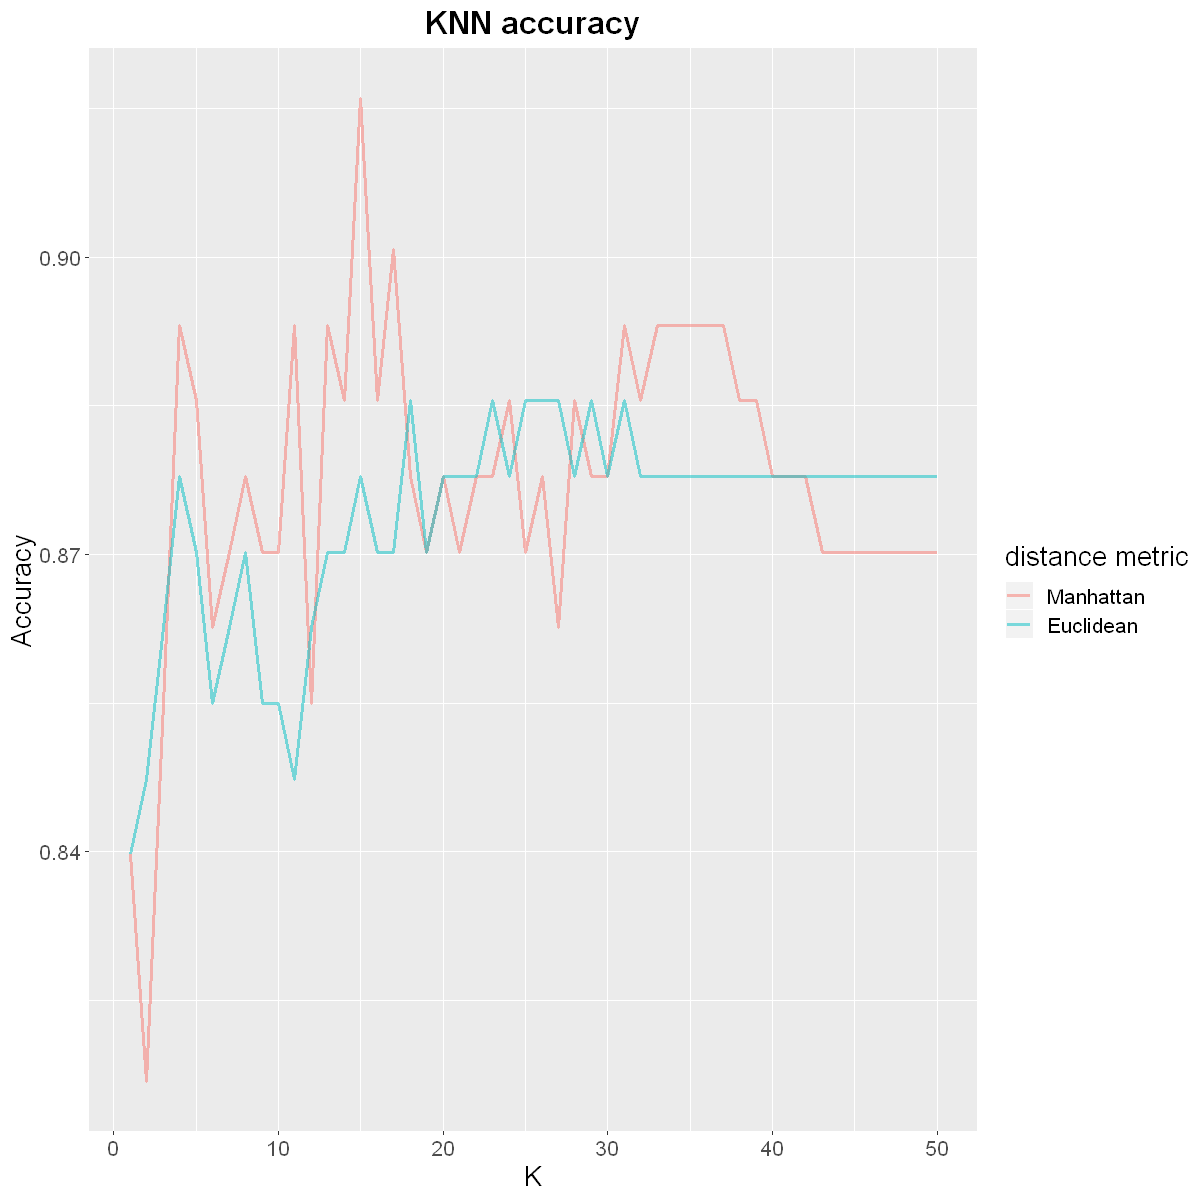

In [10]:
library(ggplot2)

K_list <- c(1:50)
knn_dist1_score <- numeric(length(K_list))
knn_dist2_score <- numeric(length(K_list))

idx <- sample(1:data[, .N], size = round(data[, .N]*.2))
data_train <- data[-idx]
data_test <- data[idx]

for (k in K_list) {
    model1 <- kknn("R1 ~ .", data_train, data_test, distance = 1, k = k, kernel = "rectangular", scale = TRUE)
    model2 <- kknn("R1 ~ .", data_train, data_test, distance = 2, k = k, kernel = "rectangular", scale = TRUE)
    knn_dist1_score[k] <- (((model1[['fitted.values']]+0.5) %>% floor) == data[idx, R1]) %>% mean
    knn_dist2_score[k] <- (((model2[['fitted.values']]+0.5) %>% floor) == data[idx, R1]) %>% mean
}

# melt for the sake of ggplot
knn_score = data.table(
    k = K_list,
    Manhattan = knn_dist1_score,
    Euclidean = knn_dist2_score
) %>% melt(., id.vars = "k", measure.vars = c("Manhattan", "Euclidean"))

options(repr.plot.width=10, repr.plot.height=10)
ggplot() + 
    geom_line(data=knn_score, aes(x=k, y=value, color=variable), alpha=.5,size=1) +
    ggtitle("KNN accuracy") + 
    labs(y="Accuracy", x="K", color="distance metric") + 
    theme(text = element_text(size=16), plot.title = element_text(hjust = 0.5, face="bold"))

#### Leave-one-out CV

Given the small data size, to utilize the information in training, one can also apply a leave-one-out CV.

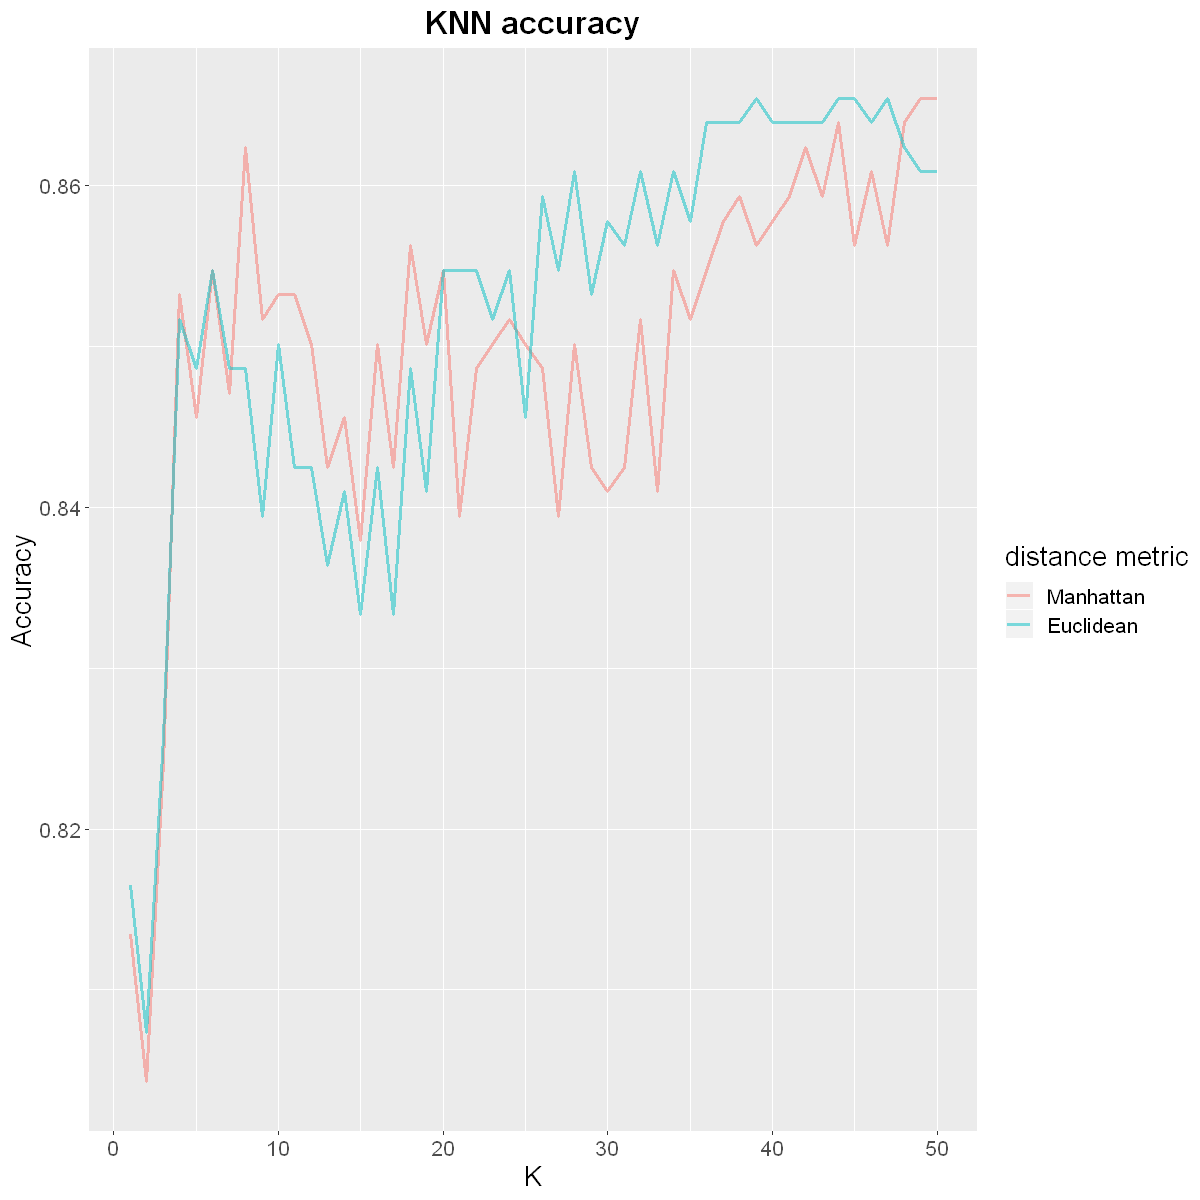

In [11]:
one_off_CV <- function(k, data) {
    N <- data[, .N]
    knn_dist1_score_k <- numeric(N)
    knn_dist2_score_k <- numeric(N)
    for (i in 1:N) {
        model1 <- kknn("R1 ~ .", data[-i], data[i], distance = 1, k = k, kernel = "rectangular", scale = TRUE)
        model2 <- kknn("R1 ~ .", data[-i], data[i], distance = 2, k = k, kernel = "rectangular", scale = TRUE)
        knn_dist1_score_k[i] <- (((model1[['fitted.values']]+0.5) %>% floor) == data[i, R1]) %>% as.numeric
        knn_dist2_score_k[i] <- (((model2[['fitted.values']]+0.5) %>% floor) == data[i, R1]) %>% as.numeric
    }
    return(c(knn_dist1_score_k %>% mean, knn_dist2_score_k %>% mean))
}

K_list <- c(1:50)
knn_dist1_score <- numeric(length(K_list))
knn_dist2_score <- numeric(length(K_list))

for (k in K_list) {
    knn_score_k <- one_off_CV(k, data)
    knn_dist1_score[k] <- knn_score_k[1]
    knn_dist2_score[k] <- knn_score_k[2]
}

# melt for the sake of ggplot
knn_score = data.table(
    k = K_list,
    Manhattan = knn_dist1_score,
    Euclidean = knn_dist2_score
) %>% melt(., id.vars = "k", measure.vars = c("Manhattan", "Euclidean"))

options(repr.plot.width=10, repr.plot.height=10)
ggplot() + 
    geom_line(data=knn_score, aes(x=k, y=value, color=variable), alpha=.5,size=1) +
    ggtitle("KNN accuracy") + 
    labs(y="Accuracy", x="K", color="distance metric") + 
    theme(text = element_text(size=16), plot.title = element_text(hjust = 0.5, face="bold"))

In [12]:
print(knn_score[, .(optimal_K = which.max(value), max_accuracy = max(value)), by=.(variable)])

    variable optimal_K max_accuracy
1: Manhattan        49    0.8654434
2: Euclidean        39    0.8654434


#### Hyper-Parameter tuning

We see that hyper-parameters apart from $K$ also matter. For example, as $K$ increases the Euclidean metric is able to generate more improvment than the Manhattan distance. We would like to finetune other parameters, including kernel. The `train.knn` function allows us to tune `K` and `kernel` jointly under the leave-one-out CV. We choose `distance=2` according to our observation above.

In [13]:
N <- data[, .N]
idx <- sample(1:N, size = round(N*.5), replace = FALSE)

trained_model <- train.kknn("R1 ~ .", data, kmax = 100, scale = TRUE, distance = 2, kernel = c("optimal", "rectangular", "triangular", "epanechnikov", "gaussian"))
print(trained_model)


Call:
train.kknn(formula = "R1 ~ .", data = data, kmax = 100, distance = 2,     kernel = c("optimal", "rectangular", "triangular", "epanechnikov",         "gaussian"), scale = TRUE)

Type of response variable: continuous
minimal mean absolute error: 0.1834862
Minimal mean squared error: 0.1007652
Best kernel: rectangular
Best k: 58


## Reference

- [A User’s Guide to Support Vector Machines](http://pyml.sourceforge.net/doc/howto.pdf)
- [A note from Boni Bruno](https://rstudio-pubs-static.s3.amazonaws.com/349520_6c62f724297f4084abb48493c6f703a5.html)
    - Boni is likely a previous student. I contacted TA and Prof. as per the course policy.